# Part II - Communicate Data Insights Ford GoBikes
## by Timothy Babatunde

## Dataset Overview

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

##### Load in the dataset into a pandas dataframe

In [2]:
bikes = pd.read_csv("201902-fordgobike-tripdata_clean.csv")
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,Date,Hour_of_day,Day_of_week,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,60


### Viewing Visualizations.

#### Creates a function

In [3]:
# Creating a function for barplot
def barplot(a, xlabel, ylabel, title):
    ''' Creates a barplot of a column
    a = column value counts
    xlabel = The label of the X axes
    ylabel = The Label on the Y axes
    title = The title of the Barchart'''
    plt.figure(figsize=[8,5])
    h = a.value_counts()
    plt.bar(x = h.keys(), height = h, color= 'green')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, size = 14)
    plt.show()

## Number of Subscribers to Customers

- In the figure below, I am trying to view the number of occurrence off each user type.

> We can see that the subscribers are way more than customers with subscribers being over 90%

In [20]:
(bikes.user_type.value_counts() / bikes.shape[0])*100

Subscriber    90.531635
Customer       9.468365
Name: user_type, dtype: float64

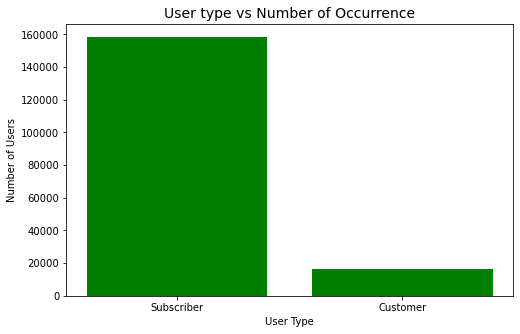

In [4]:
barplot(bikes.user_type, 'User Type', 'Number of Users', 'User type vs Number of Occurrence')

## Gender type occurrence

- In the figure below, I am trying to view the number of each gender type in the dataset.

> We can see that the Males are more than any other gender in the data set with the Males being 130500

Male      130500
Female     40804
Other       3647
Name: member_gender, dtype: int64


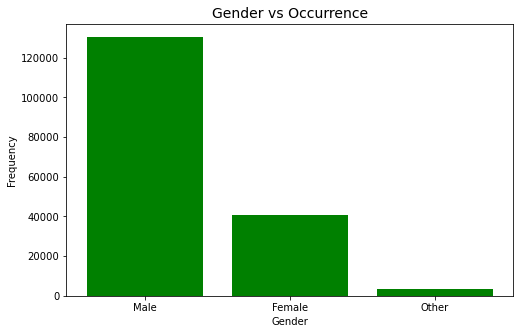

In [5]:
print(bikes['member_gender'].value_counts())
barplot(bikes.member_gender, 'Gender', 'Frequency', 'Gender vs Occurrence')

## Relationship between User type and Duration of trips

- Here, I am viewing the time spent by each user type in the dataset. 

> Taking into consideration the first 0 to 4000 secs.

> We can see that the majority customers are spending more time in trip durations than the subscribers.

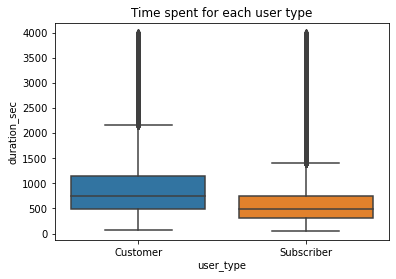

In [7]:
#Box plot of trip duration of user type
x = bikes['user_type']

df = bikes.query("duration_sec < = 4000")
y = df.duration_sec
ax = sb.boxplot(x,y).set(title='Time spent for each user type');

## Relationship between trip duration, user type and gender 

- Here, I am trying to visualize the the relationship between the trip duration, user_type and gender, I also show the average time spent by each gender and user_type.

> Here we can find that although male subscribers spend almost the same time on trips than other genders (female and others), Other on an average spend most times on trips.

> This further shows that majority of male subscribers spend less time on the road.

In [8]:
avr_use_gend = bikes.groupby(['user_type', 'member_gender'])['duration_sec'].mean().sort_values(ascending= False)
print('The average time spent by each user_type and gender is:\n',avr_use_gend)

The average time spent by each user_type and gender is:
 user_type   member_gender
Customer    Other            1602.300000
            Female           1424.117265
            Male             1253.593492
Subscriber  Other             912.174539
            Female            696.428031
            Male              616.266085
Name: duration_sec, dtype: float64


In [14]:
tot_use_gend = bikes.groupby(['user_type', 'member_gender'])['duration_sec'].sum().sort_values(ascending= False)
print('The average time spent by each user_type and gender is:\n', tot_use_gend)

The average time spent by each user_type and gender is:
 user_type   member_gender
Subscriber  Male             73339978
            Female           25198159
Customer    Male             14407550
            Female            6582270
Subscriber  Other             2916222
Customer    Other              721035
Name: duration_sec, dtype: int64


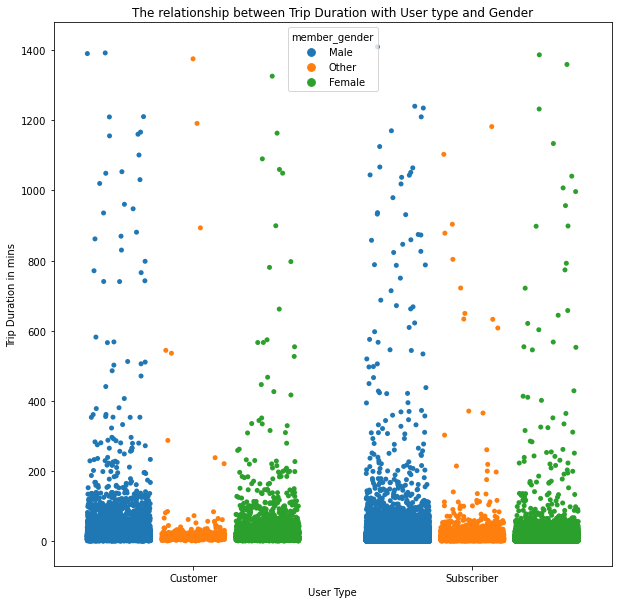

In [12]:
# Visuallizing the relation between trip duration with user type and gender 

plt.figure(figsize =[10, 10])
sb.stripplot(data =bikes, x="user_type", y="duration_min", hue = 'member_gender', jitter= 0.34, dodge =True)
plt.title("The relationship between Trip Duration with User type and Gender")
plt.xlabel("User Type") 
plt.ylabel("Trip Duration in mins");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Slide_deck_Ford_GoBikes.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Slide_deck_Ford_GoBikes.ipynb to slides
[NbConvertApp] Writing 724550 bytes to Part_II_Slide_deck_Ford_GoBikes.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\timothy\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\timothy\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\timothy\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\timothy\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\timothy\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
